# 📊 Predicting Student Exam Performance
***

<p style="text-align: center;margin-left:150px">
<img src="https://miro.medium.com/v2/resize:fit:1400/1*uV31h9yCwNVDv5OLYSHvlA.png" alt="Machine Learning" style="width: 800px; height: 400px;">
</p>

## **1️⃣ Problem Statement**
The goal of this project is to develop a **machine learning model** that predicts whether a student will **pass or fail** their upcoming exam.  
We will use various academic, social, and behavioral factors as input features to understand key influences on student performance.

## **2️⃣ Data Overview**
The dataset consists of student records, including:  
- **Demographics:** Age, gender, living situation, financial status  
- **Academic Factors:** Previous exam scores, attendance, study habits  
- **Social & Psychological Factors:** Parental involvement, bullying, extracurricular activities  
- **Future Plans:** University aspirations, JAMB target scores  

## **3️⃣ Approach**
Our approach involves the following steps:
1. **Data Preprocessing:** encoding categorical variables, and feature selection  
3. **Model Training & Selection:** Comparing multiple ML algorithms (Logistic Regression, Random Forest, XGBoost, etc.)  
4. **Hyperparameter Tuning:** Optimizing the best-performing model  
5. **Model Evaluation:** Using accuracy, precision, recall, and F1-score  

## **4️⃣ Expected Outcome**
- A well-optimized model that predicts student performance with high accuracy  
- Insights into the most important factors affecting academic success
- Recommendations for intervention strategies to improve student outcomes  


In [1223]:
#Load Data
import pandas as pd
pd.options.display.max_columns = 10
pd.options.display.max_rows = 10

student_df = pd.read_csv('../data/processed_survey_data.csv')
add_df = pd.read_csv('synthetic_data.csv')
student_df.head()

Student ID  Gender Age Group Living Situation   Parent Education Level  \
0        1001  Female   15 - 16     Both parents  Post-graduate education   
1        1002  Female   15 - 16     Both parents         Higher Education   
2        1003    Male   15 - 16     Both parents  Post-graduate education   
3        1004    Male   12 - 14     Both parents         Higher Education   
4        1005    Male   15 - 16    Single parent         Higher Education   

   ...                               Free Time Activities Language at Home  \
0  ...                               Doing chores at home           Yoruba   
1  ...                                             Others           Yoruba   
2  ...                                     Playing sports          English   
3  ...  Studying,Socializing with friends,Watching mov...          English   
4  ...  Watching movies,Playing sports,Doing chores at...          English   

  Involved in Work Outside School Last Exam Performance Foundational Knowledge  
0                      Frequently             60% - 69%                Average  
1                    Occasionally            70% - 100%                 Strong  
2                              No             60% - 69%                Average  
3                              No            70% - 100%                Average  
4                              No             60% - 69%                 Strong  

[5 rows x 47 columns]

In [1224]:
add_df.head()

Gender Age Group Living Situation   Parent Education Level  \
0  Female   15 - 16     Both parents         Secondary school   
1    Male   12 - 14         Guardian         Secondary school   
2  Female   15 - 16     Both parents         Higher Education   
3  Female   15 - 16     Both parents  Post-graduate education   
4  Female   15 - 16     Both parents         Secondary school   

                       Family Financial Status  ...  \
0              We struggle to meet basic needs  ...   
1                  We can afford some luxuries  ...   
2  We meet our needs but can't afford luxuries  ...   
3  We meet our needs but can't afford luxuries  ...   
4                  We can afford some luxuries  ...   

  Confidence in Academic Ability Access to Counseling  \
0             Somewhat confident                   No   
1             Somewhat confident                  Yes   
2             Somewhat confident                  Yes   
3             Somewhat confident         I'm not sure   
4                  Not confident         I'm not sure   

  Motivation for Attending School Last Exam Performance Foundational Knowledge  
0     To learn and gain knowledge             40% - 59%                Average  
1     To learn and gain knowledge            70% - 100%                 Strong  
2    To prepare for a good career             60% - 69%                Average  
3    To prepare for a good career             40% - 59%                Average  
4     To learn and gain knowledge             60% - 69%                Average  

[5 rows x 29 columns]

In [1227]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [1229]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 47 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Student ID                             100 non-null    int64 
 1   Gender                                 100 non-null    object
 2   Age Group                              100 non-null    object
 3   Living Situation                       100 non-null    object
 4   Parent Education Level                 100 non-null    object
 5   Family Financial Status                100 non-null    object
 6   Class                                  100 non-null    object
 7   Department                             100 non-null    object
 8   Performance in English                 100 non-null    object
 9   Performance in Maths                   100 non-null    object
 10  Performance in Biology                 100 non-null    object
 11  Performance in Physi

### **Handling Different Student Departments in Our Model** 📌  

In our dataset, students belong to **three different departments**:  
- **Science** 🧪 (Maths, Physics, Chemistry, Biology, etc.)  
- **Arts** 🎭 (Literature, Government, CRS, etc.)  
- **Commercial** 💼 (Commerce, Accounting, Economics, etc.)  

Since each department has its own set of subjects, we need a **single model that accommodates all departments** while ensuring that irrelevant subjects don’t interfere.  

### **Our Approach** 🤔  
✅ **Unified Model** – Instead of training three separate models, we will use **one model** that includes all subjects.  
✅ **Handling Unrelated Subjects** – If a subject is not relevant to a student’s department, we replace the value with `0`.  
✅ **Consistent Feature Space** – The model sees all subjects, but only the relevant ones carry meaningful values.  

### **How It Works** ⚙️  
1. **Replace “Nil” with `0`** in subject columns that don’t apply to a student's department.  
2. **Train a single Decision Tree model** that learns from all students while considering the `0` values appropriately.  
3. **Make predictions** based on the complete dataset, where the model understands which subjects contribute to performance.  

This approach ensures our model is **more flexible, scalable, and capable of handling mixed-department students effectively!** 🚀  


In [1231]:
# Define subject groups based on department
science_subjects = ['Performance in English','Performance in Maths', 'Performance in Physics', 'Performance in Chemistry', 'Performance in Biology']
arts_subjects = ['Performance in English','Performance in Maths','Performance in Lit in English', 'Performance in Government', 'Performance in CRS']
commercial_subjects = ['Performance in English','Performance in Maths','Performance in Commerce', 'Performance in Accounting', 'Performance in Economics']

In [1232]:
# Defining common features (these apply to all students)
common_features = [
    "Gender",
    "Age Group",
    "Family Financial Status",
    "Study Hours per Week",
    "Extra Tutoring",
    "School Attendance",
    "Extracurricular Participation",
    "Experienced Bullying",
    "Stress About Schoolwork",
    "Confidence in Academic Ability",
    "Motivation for Attending School"
]

In [1234]:
# Defining the target variable (what we are predicting)
target = "Last Exam Performance" 

Not all columns are relevant for the prediction. Defining columns to drop

In [1238]:
dropping = [
    "Student ID", "Language at Home", "Free Time Activities", 
    "Reason To Dropout", "Type of Bullying", "Trusted Teacher", 
    "Involved in Work Outside School", "Extracurricular Participation", 
    "Extracurricular Hours", "Considered Dropping Out", 
    "Comfort in School Environment", "Home Learning Resources", 
    "School Learning Resources", "Plan to Attend University", 
    "JAMB Goal Score", "Parents Help with Homework", 
    "Parents Encourage Higher Education", "Stress About Schoolwork"
]

# Ensuring only existing columns are dropped
dropping = [col for col in dropping if col in student_df.columns]

# Drop them
student_df.drop(columns=dropping, inplace=True)

# Check remaining columns
print(student_df.columns.tolist())

['Gender', 'Age Group', 'Living Situation', 'Parent Education Level', 'Family Financial Status', 'Class', 'Department', 'Performance in English', 'Performance in Maths', 'Performance in Biology', 'Performance in Physics', 'Performance in Chemistry', 'Performance in Lit in English', 'Performance in Government', 'Performance in CRS', 'Performance in Commerce', 'Performance in Accounting', 'Performance in Economics', 'Study Hours per Week', 'Extra Tutoring', 'School Attendance', 'Experienced Bullying', 'Peer Pressure', 'Parents Attend Parent-Teacher Meeting', 'Confidence in Academic Ability', 'Access to Counseling', 'Motivation for Attending School', 'Last Exam Performance', 'Foundational Knowledge']


In [1240]:
student_df.head()

Gender Age Group Living Situation   Parent Education Level  \
0  Female   15 - 16     Both parents  Post-graduate education   
1  Female   15 - 16     Both parents         Higher Education   
2    Male   15 - 16     Both parents  Post-graduate education   
3    Male   12 - 14     Both parents         Higher Education   
4    Male   15 - 16    Single parent         Higher Education   

                       Family Financial Status  ...  \
0  We meet our needs but can't afford luxuries  ...   
1                  We can afford some luxuries  ...   
2  We meet our needs but can't afford luxuries  ...   
3                  We can afford some luxuries  ...   
4               We are financially comfortable  ...   

  Confidence in Academic Ability Access to Counseling  \
0             Somewhat confident         I'm not sure   
1                  Not confident         I'm not sure   
2             Somewhat confident                  Yes   
3                 Very confident                  Yes   
4             Somewhat confident                   No   

  Motivation for Attending School Last Exam Performance Foundational Knowledge  
0     To learn and gain knowledge             60% - 69%                Average  
1    To prepare for a good career            70% - 100%                 Strong  
2    To prepare for a good career             60% - 69%                Average  
3     To learn and gain knowledge            70% - 100%                Average  
4    To prepare for a good career             60% - 69%                 Strong  

[5 rows x 29 columns]

In [1243]:
# Merge the datasets
merged_df = pd.concat([student_df, add_df], ignore_index=True)

# Save merged dataset
merged_df.to_csv('../data/merged_survey_data.csv', index=False)

print(f"Merging complete! New dataset has {merged_df.shape[0]} rows and {merged_df.shape[1]} columns.")

Merging complete! New dataset has 1000 rows and 29 columns.


In [1245]:
merged_df.head()

Gender Age Group Living Situation   Parent Education Level  \
0  Female   15 - 16     Both parents  Post-graduate education   
1  Female   15 - 16     Both parents         Higher Education   
2    Male   15 - 16     Both parents  Post-graduate education   
3    Male   12 - 14     Both parents         Higher Education   
4    Male   15 - 16    Single parent         Higher Education   

                       Family Financial Status  ...  \
0  We meet our needs but can't afford luxuries  ...   
1                  We can afford some luxuries  ...   
2  We meet our needs but can't afford luxuries  ...   
3                  We can afford some luxuries  ...   
4               We are financially comfortable  ...   

  Confidence in Academic Ability Access to Counseling  \
0             Somewhat confident         I'm not sure   
1                  Not confident         I'm not sure   
2             Somewhat confident                  Yes   
3                 Very confident                  Yes   
4             Somewhat confident                   No   

  Motivation for Attending School Last Exam Performance Foundational Knowledge  
0     To learn and gain knowledge             60% - 69%                Average  
1    To prepare for a good career            70% - 100%                 Strong  
2    To prepare for a good career             60% - 69%                Average  
3     To learn and gain knowledge            70% - 100%                Average  
4    To prepare for a good career             60% - 69%                 Strong  

[5 rows x 29 columns]

In [1247]:
for column in merged_df.columns:
    unique_values = merged_df[column].unique()
    print(f"Column: {column}")
    print(unique_values)
    print("-" * 50)

Column: Gender
['Female' 'Male']
--------------------------------------------------
Column: Age Group
['15 - 16' '12 - 14' '17 - 18']
--------------------------------------------------
Column: Living Situation
['Both parents' 'Single parent' 'Guardian']
--------------------------------------------------
Column: Parent Education Level
['Post-graduate education' 'Higher Education' 'Primary school'
 'Secondary school' 'No formal education']
--------------------------------------------------
Column: Family Financial Status
["We meet our needs but can't afford luxuries"
 'We can afford some luxuries' 'We are financially comfortable'
 'We struggle to meet basic needs']
--------------------------------------------------
Column: Class
['SS2' 'SS3' 'SS1']
--------------------------------------------------
Column: Department
['Science' 'Commercial' 'Humanities']
--------------------------------------------------
Column: Performance in English
['Excellent' 'Good' 'Fair']
-------------------------

In [1189]:
# merged_df.replace("Nil", "Unknown", inplace=True)

In [1249]:
"""for column in merged_df.columns:
    unique_values = merged_df[column].unique()
    print(f"Column: {column}")
    print(unique_values)
    print("-" * 50)"""

'for column in merged_df.columns:\n    unique_values = merged_df[column].unique()\n    print(f"Column: {column}")\n    print(unique_values)\n    print("-" * 50)'

In [1251]:
print(merged_df.isnull().sum())  # Checking missing values in each column

Gender                             0
Age Group                          0
Living Situation                   0
Parent Education Level             0
Family Financial Status            0
                                  ..
Confidence in Academic Ability     0
Access to Counseling               0
Motivation for Attending School    0
Last Exam Performance              0
Foundational Knowledge             0
Length: 29, dtype: int64


In [1253]:
# Checking for missing values in key columns
print(merged_df[['Performance in Physics', 'Department']].isnull().sum())

Performance in Physics    0
Department                0
dtype: int64


In [1255]:
print(merged_df.isnull().sum())  # Check for NaN
print(merged_df.eq("").sum())    # Check for empty strings
print(merged_df.eq(" ").sum())   # Check for spaces

Gender                             0
Age Group                          0
Living Situation                   0
Parent Education Level             0
Family Financial Status            0
                                  ..
Confidence in Academic Ability     0
Access to Counseling               0
Motivation for Attending School    0
Last Exam Performance              0
Foundational Knowledge             0
Length: 29, dtype: int64
Gender                             0
Age Group                          0
Living Situation                   0
Parent Education Level             0
Family Financial Status            0
                                  ..
Confidence in Academic Ability     0
Access to Counseling               0
Motivation for Attending School    0
Last Exam Performance              0
Foundational Knowledge             0
Length: 29, dtype: int64
Gender                             0
Age Group                          0
Living Situation                   0
Parent Education Level   

In [1257]:
# Save student_df
file_name = '../data/processed_ML_data.csv'
merged_df.to_csv(file_name, index=False)

print(f"Data has been saved at {file_name}")

Data has been saved at ../data/processed_ML_data.csv


### Training, Validation and Test Sets

In [1260]:
# First split: 80% train, 20% temp (test + validation)
train_df, temp_df = train_test_split(merged_df, test_size=0.2, random_state=42)

# Second split: 50% of temp goes to test, 50% to validation (10% each of total dataset)
test_df, val_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Check shapes
print(f"Train shape: {train_df.shape}")  # (80, 29)
print(f"Validation shape: {val_df.shape}")  # (10, 29)
print(f"Test shape: {test_df.shape}")  # (10, 29)

Train shape: (800, 29)
Validation shape: (100, 29)
Test shape: (100, 29)


In [1262]:
# Define the target variable
target_col = 'Last Exam Performance'

# Keep all columns except the target column
input_cols = [col for col in merged_df.columns if col != target_col]

# Split into inputs and targets
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

# Identify numeric and categorical columns
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes(include='object').columns.tolist()

# Print results
print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)

Numeric Columns: []
Categorical Columns: ['Gender', 'Age Group', 'Living Situation', 'Parent Education Level', 'Family Financial Status', 'Class', 'Department', 'Performance in English', 'Performance in Maths', 'Performance in Biology', 'Performance in Physics', 'Performance in Chemistry', 'Performance in Lit in English', 'Performance in Government', 'Performance in CRS', 'Performance in Commerce', 'Performance in Accounting', 'Performance in Economics', 'Study Hours per Week', 'Extra Tutoring', 'School Attendance', 'Experienced Bullying', 'Peer Pressure', 'Parents Attend Parent-Teacher Meeting', 'Confidence in Academic Ability', 'Access to Counseling', 'Motivation for Attending School', 'Foundational Knowledge']


### Scaling Numeric Features  
There are no numeric features available for scaling in this dataset. Therefore, we will proceed with encoding categorical features.

### Encoding Categorical Data  
Since our dataset consists only of categorical variables, we will use One-Hot Encoding to transform them into a numerical format. We will also handle missing values by replacing them with 'Unknown' before encoding.

In [1265]:
# Convert categorical columns to strings
train_inputs[categorical_cols] = train_inputs[categorical_cols].astype(str)
val_inputs[categorical_cols] = val_inputs[categorical_cols].astype(str)
test_inputs[categorical_cols] = test_inputs[categorical_cols].astype(str)

# One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(train_inputs[categorical_cols])

# Transform the categorical columns
train_encoded = pd.DataFrame(encoder.transform(train_inputs[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols), index=train_inputs.index)
val_encoded = pd.DataFrame(encoder.transform(val_inputs[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols), index=val_inputs.index)
test_encoded = pd.DataFrame(encoder.transform(test_inputs[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols), index=test_inputs.index)

# Concatenate with the original dataset (dropping original categorical columns)
X_train = pd.concat([train_inputs.drop(columns=categorical_cols), train_encoded], axis=1)
X_val = pd.concat([val_inputs.drop(columns=categorical_cols), val_encoded], axis=1)
X_test = pd.concat([test_inputs.drop(columns=categorical_cols), test_encoded], axis=1)

# De-fragment the DataFrame to optimize memory usage
X_train = X_train.copy()
X_val = X_val.copy()
X_test = X_test.copy()

In [1267]:
X_train.head()

Gender_Female  Gender_Male  Age Group_12 - 14  Age Group_15 - 16  \
29             1.0          0.0                0.0                1.0   
535            0.0          1.0                1.0                0.0   
695            1.0          0.0                1.0                0.0   
557            1.0          0.0                0.0                1.0   
836            0.0          1.0                0.0                1.0   

     Age Group_17 - 18  ...  \
29                 0.0  ...   
535                0.0  ...   
695                0.0  ...   
557                0.0  ...   
836                0.0  ...   

     Motivation for Attending School_To meet family expectations  \
29                                                 0.0             
535                                                0.0             
695                                                0.0             
557                                                0.0             
836                                                0.0             

     Motivation for Attending School_To prepare for a good career  \
29                                                 0.0              
535                                                0.0              
695                                                0.0              
557                                                0.0              
836                                                1.0              

     Foundational Knowledge_Average  Foundational Knowledge_Strong  \
29                              1.0                            0.0   
535                             0.0                            1.0   
695                             1.0                            0.0   
557                             1.0                            0.0   
836                             0.0                            0.0   

     Foundational Knowledge_Weak  
29                           0.0  
535                          0.0  
695                          0.0  
557                          0.0  
836                          1.0  

[5 rows x 111 columns]

### Training and Visualizing Decision Trees

In [1269]:
from sklearn.tree import DecisionTreeClassifier

In [1270]:
model = DecisionTreeClassifier(random_state=42)

In [1271]:
%%time
model.fit(X_train, train_targets)

CPU times: total: 31.2 ms
Wall time: 49.5 ms


DecisionTreeClassifier(random_state=42)

#### Evaluation

In [1273]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [1274]:
train_preds = model.predict(X_train)

In [1275]:
train_preds

array(['60% - 69%', '60% - 69%', '70% - 100%', '60% - 69%', '70% - 100%',
       '40% - 59%', '70% - 100%', '60% - 69%', '70% - 100%', '60% - 69%',
       '60% - 69%', '70% - 100%', '40% - 59%', '70% - 100%', '60% - 69%',
       '40% - 59%', '60% - 69%', '70% - 100%', '60% - 69%', '40% - 59%',
       '40% - 59%', '60% - 69%', '60% - 69%', '70% - 100%', '60% - 69%',
       '60% - 69%', '60% - 69%', '60% - 69%', '60% - 69%', '60% - 69%',
       '70% - 100%', '60% - 69%', '60% - 69%', 'Below 40%', '60% - 69%',
       '70% - 100%', '70% - 100%', '60% - 69%', '40% - 59%', '60% - 69%',
       '70% - 100%', '40% - 59%', '60% - 69%', '60% - 69%', '70% - 100%',
       '40% - 59%', '70% - 100%', '60% - 69%', '40% - 59%', '70% - 100%',
       '40% - 59%', '70% - 100%', '40% - 59%', '40% - 59%', '70% - 100%',
       '70% - 100%', '70% - 100%', '60% - 69%', '60% - 69%', 'Below 40%',
       '60% - 69%', '70% - 100%', '40% - 59%', '70% - 100%', '40% - 59%',
       '60% - 69%', 'Below 40%', 'Below 40%

In [1276]:
pd.Series(train_preds).value_counts()

60% - 69%     328
70% - 100%    322
40% - 59%     109
Below 40%      41
Name: count, dtype: int64

The decision tree also returns probabilities for each prediction.

In [1285]:
train_probs = model.predict_proba(X_train)

In [1287]:
train_probs

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [1289]:
accuracy_score(train_targets, train_preds)

1.0

The training set accuracy is close to 100%! But we can't rely solely on the training set accuracy, we must evaluate the model on the validation set too.

We can make predictions and compute accuracy in one step using model.score

In [1292]:
model.score(X_val, val_targets)

0.37

visualizing the decision tree learned from the training data.

In [1295]:
from sklearn.tree import plot_tree, export_text

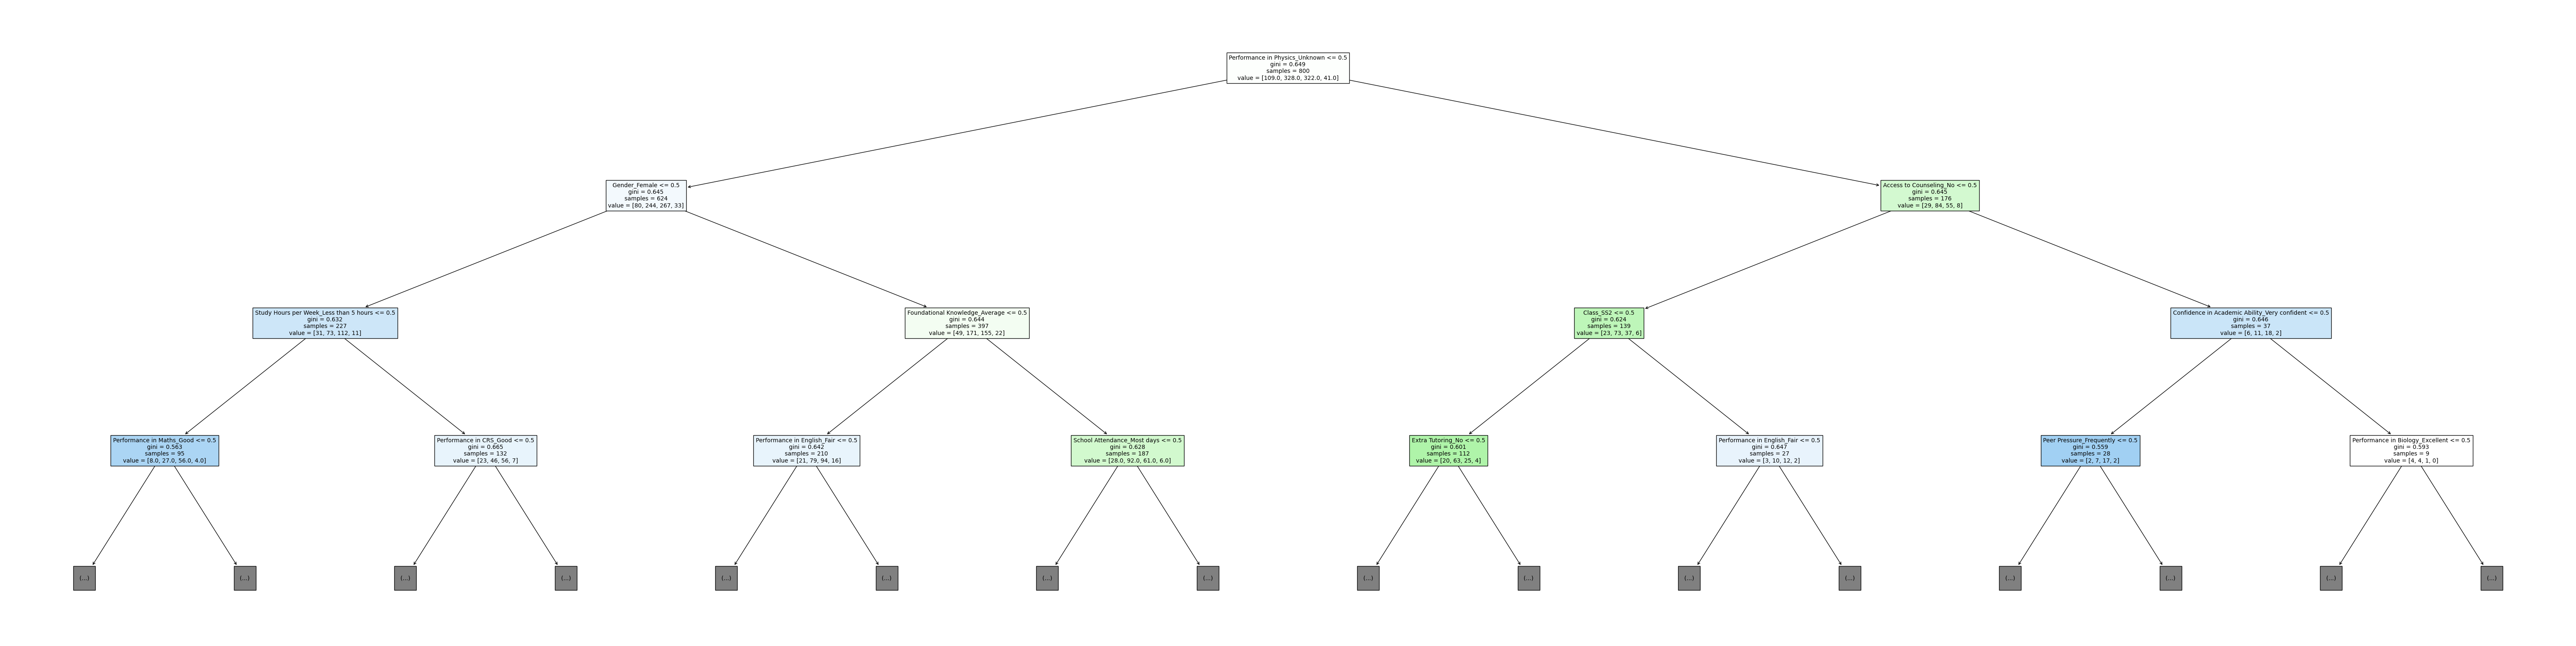

In [1297]:
import matplotlib.pyplot as plt

plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=3, filled=True);

In [1301]:
model.tree_.max_depth

19

Feature Importance

In [1304]:
model.feature_importances_

array([0.00921731, 0.        , 0.01509121, 0.01725132, 0.01033642,
       0.01341504, 0.00725149, 0.01251026, 0.01865468, 0.00256923,
       0.01491239, 0.01216852, 0.01212808, 0.02544567, 0.01447783,
       0.00192692, 0.00462461, 0.01466601, 0.00921245, 0.01106995,
       0.01461892, 0.00289038, 0.        , 0.01181845, 0.02123362,
       0.00694601, 0.00834813, 0.02358491, 0.02385536, 0.00633149,
       0.00762419, 0.01468637, 0.00980776, 0.        , 0.        ,
       0.01411881, 0.01481948, 0.01612803, 0.00366003, 0.00321154,
       0.        , 0.00585785, 0.00192692, 0.00936163, 0.00562019,
       0.        , 0.00522053, 0.00521875, 0.01596072, 0.00755465,
       0.01186812, 0.00616615, 0.00979977, 0.00439337, 0.01267251,
       0.00930247, 0.        , 0.00591215, 0.        , 0.        ,
       0.00853219, 0.00192692, 0.01930734, 0.        , 0.        ,
       0.        , 0.00330329, 0.        , 0.        , 0.        ,
       0.        , 0.00335835, 0.        , 0.        , 0.     

In [1306]:
X_train.columns

Index(['Gender_Female', 'Gender_Male', 'Age Group_12 - 14',
       'Age Group_15 - 16', 'Age Group_17 - 18',
       'Living Situation_Both parents', 'Living Situation_Guardian',
       'Living Situation_Single parent',
       'Parent Education Level_Higher Education',
       'Parent Education Level_No formal education',
       ...
       'Access to Counseling_No', 'Access to Counseling_Yes',
       'Motivation for Attending School_Others',
       'Motivation for Attending School_To avoid being bored at home',
       'Motivation for Attending School_To learn and gain knowledge',
       'Motivation for Attending School_To meet family expectations',
       'Motivation for Attending School_To prepare for a good career',
       'Foundational Knowledge_Average', 'Foundational Knowledge_Strong',
       'Foundational Knowledge_Weak'],
      dtype='object', length=111)

In [1308]:

importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [1310]:
importance_df.head(10)

feature  importance
13  Family Financial Status_We are financially com...    0.025446
28                          Performance in Maths_Good    0.023855
91                           Peer Pressure_Frequently    0.023821
92                                Peer Pressure_Never    0.023742
27                          Performance in Maths_Fair    0.023585
88                    Experienced Bullying_Frequently    0.021994
24                        Performance in English_Fair    0.021234
95    Parents Attend Parent-Teacher Meeting_Regularly    0.020550
96    Parents Attend Parent-Teacher Meeting_Sometimes    0.020253
97       Confidence in Academic Ability_Not confident    0.020028

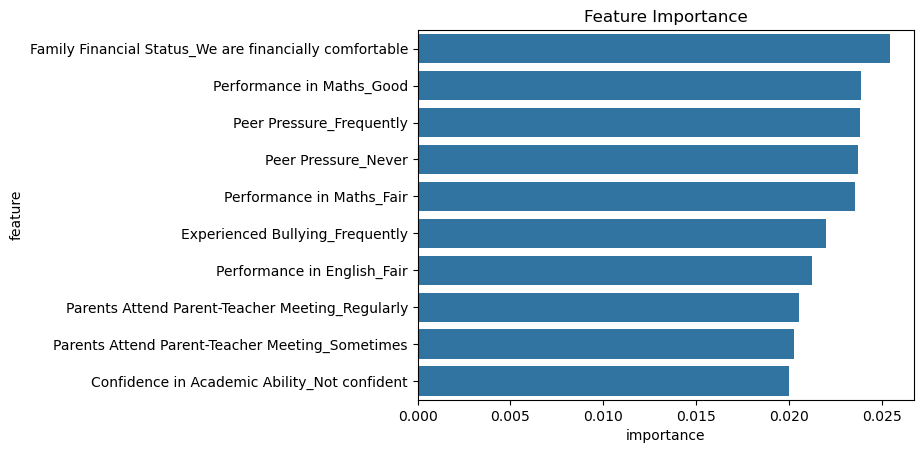

In [1312]:
import seaborn as sns

plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

### Hyperparameter Tuning and Overfitting

In [1614]:
model = DecisionTreeClassifier(max_depth=9, random_state=42)

In [1616]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=9, random_state=42)

In [1618]:
model.score(X_train, train_targets)

0.7975

In [1620]:
model.score(X_val, val_targets)

0.43

In [1622]:
model.classes_

array(['40% - 59%', '60% - 69%', '70% - 100%', 'Below 40%'], dtype=object)

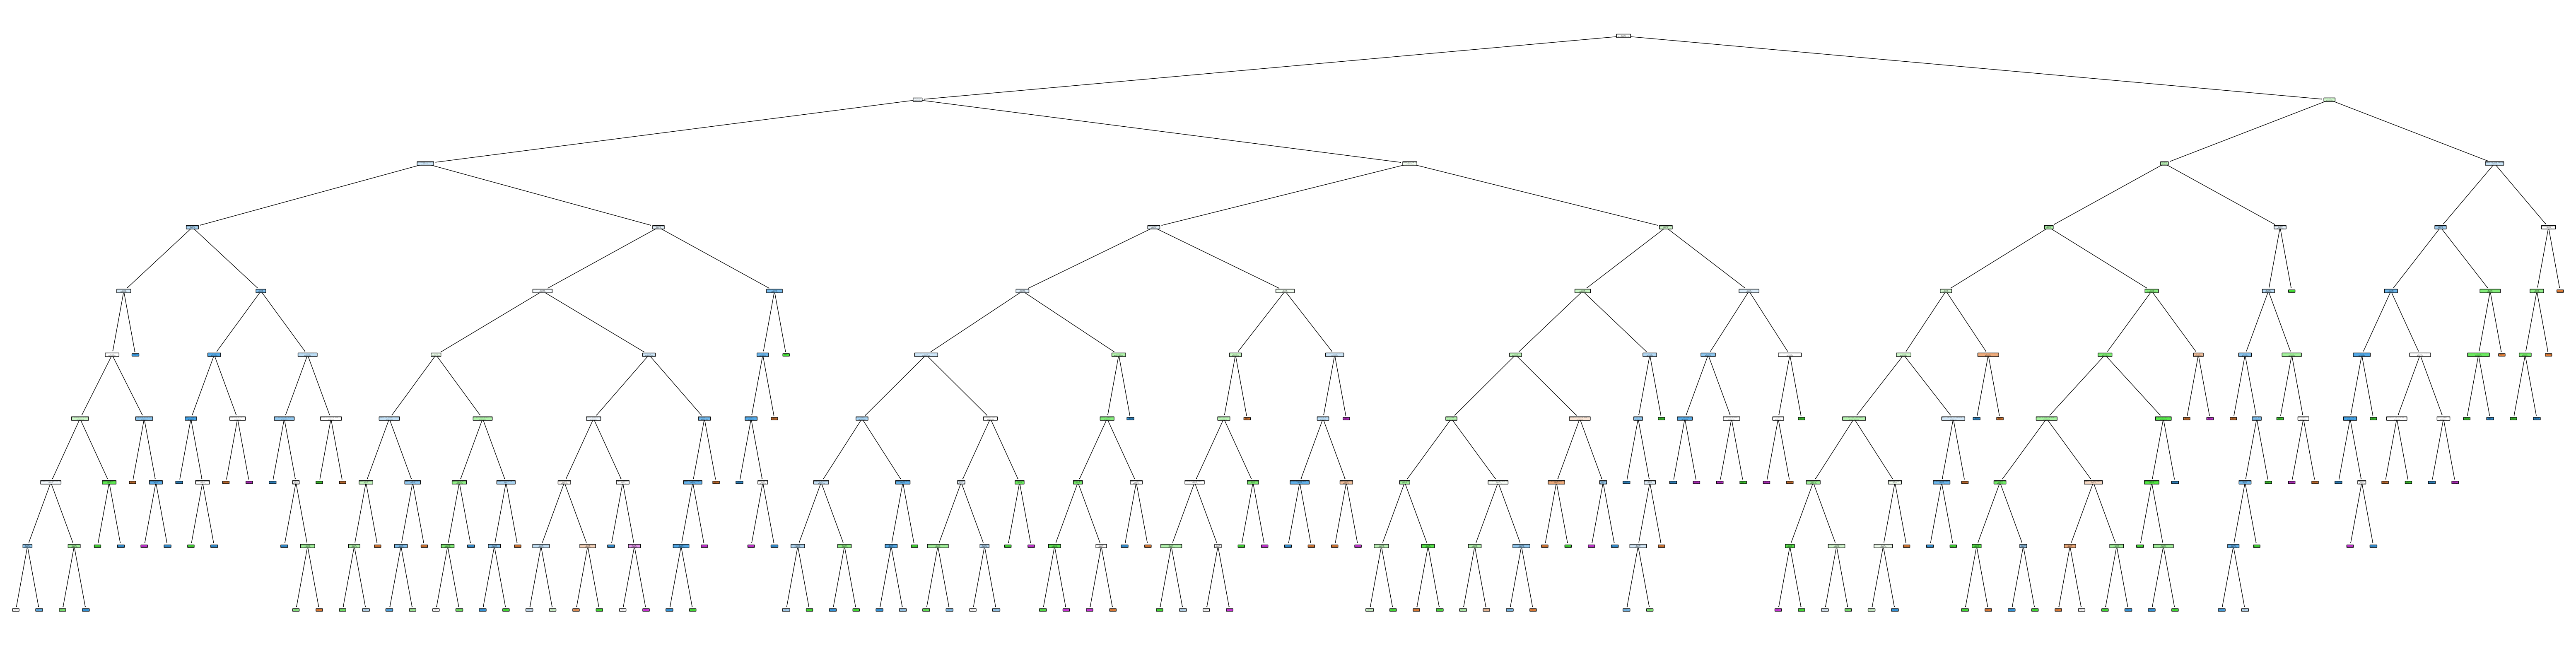

In [1624]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

In [1625]:
def max_depth_error(md): # Max Depth Value
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_targets)
    train_error = 1 - model.score(X_train, train_targets)
    val_error = 1 - model.score(X_val, val_targets)
    return {'Max Depth': md, 'Training Error': train_error, 'Validation Error': val_error}

In [1626]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

CPU times: total: 531 ms
Wall time: 531 ms


In [1627]:
errors_df

Max Depth  Training Error  Validation Error
0           1         0.56125              0.51
1           2         0.53250              0.57
2           3         0.50750              0.53
3           4         0.48750              0.52
4           5         0.44375              0.58
..        ...             ...               ...
15         16         0.01250              0.63
16         17         0.00625              0.61
17         18         0.00250              0.62
18         19         0.00000              0.63
19         20         0.00000              0.63

[20 rows x 3 columns]

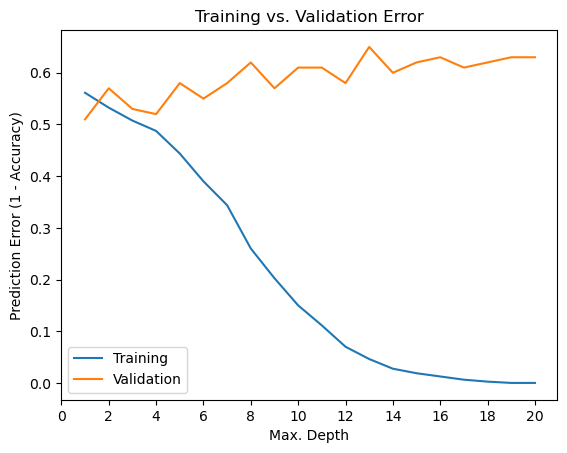

In [1628]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

### Training a Random Forest

In [1657]:
from sklearn.ensemble import RandomForestClassifier

In [1709]:
model = RandomForestClassifier(n_jobs=-1, random_state=30)

In [1711]:
%%time
model.fit(X_train, train_targets)

CPU times: total: 812 ms
Wall time: 479 ms


RandomForestClassifier(n_jobs=-1, random_state=30)

In [1712]:
model.score(X_train, train_targets)

1.0

In [1715]:
model.score(X_val, val_targets)

0.46

In [1717]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.01, 0.84, 0.13, 0.02],
       [0.06, 0.73, 0.19, 0.02],
       [0.04, 0.17, 0.74, 0.05],
       ...,
       [0.01, 0.26, 0.73, 0.  ],
       [0.06, 0.8 , 0.1 , 0.04],
       [0.03, 0.67, 0.3 , 0.  ]])

In [1719]:
model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=619091749)

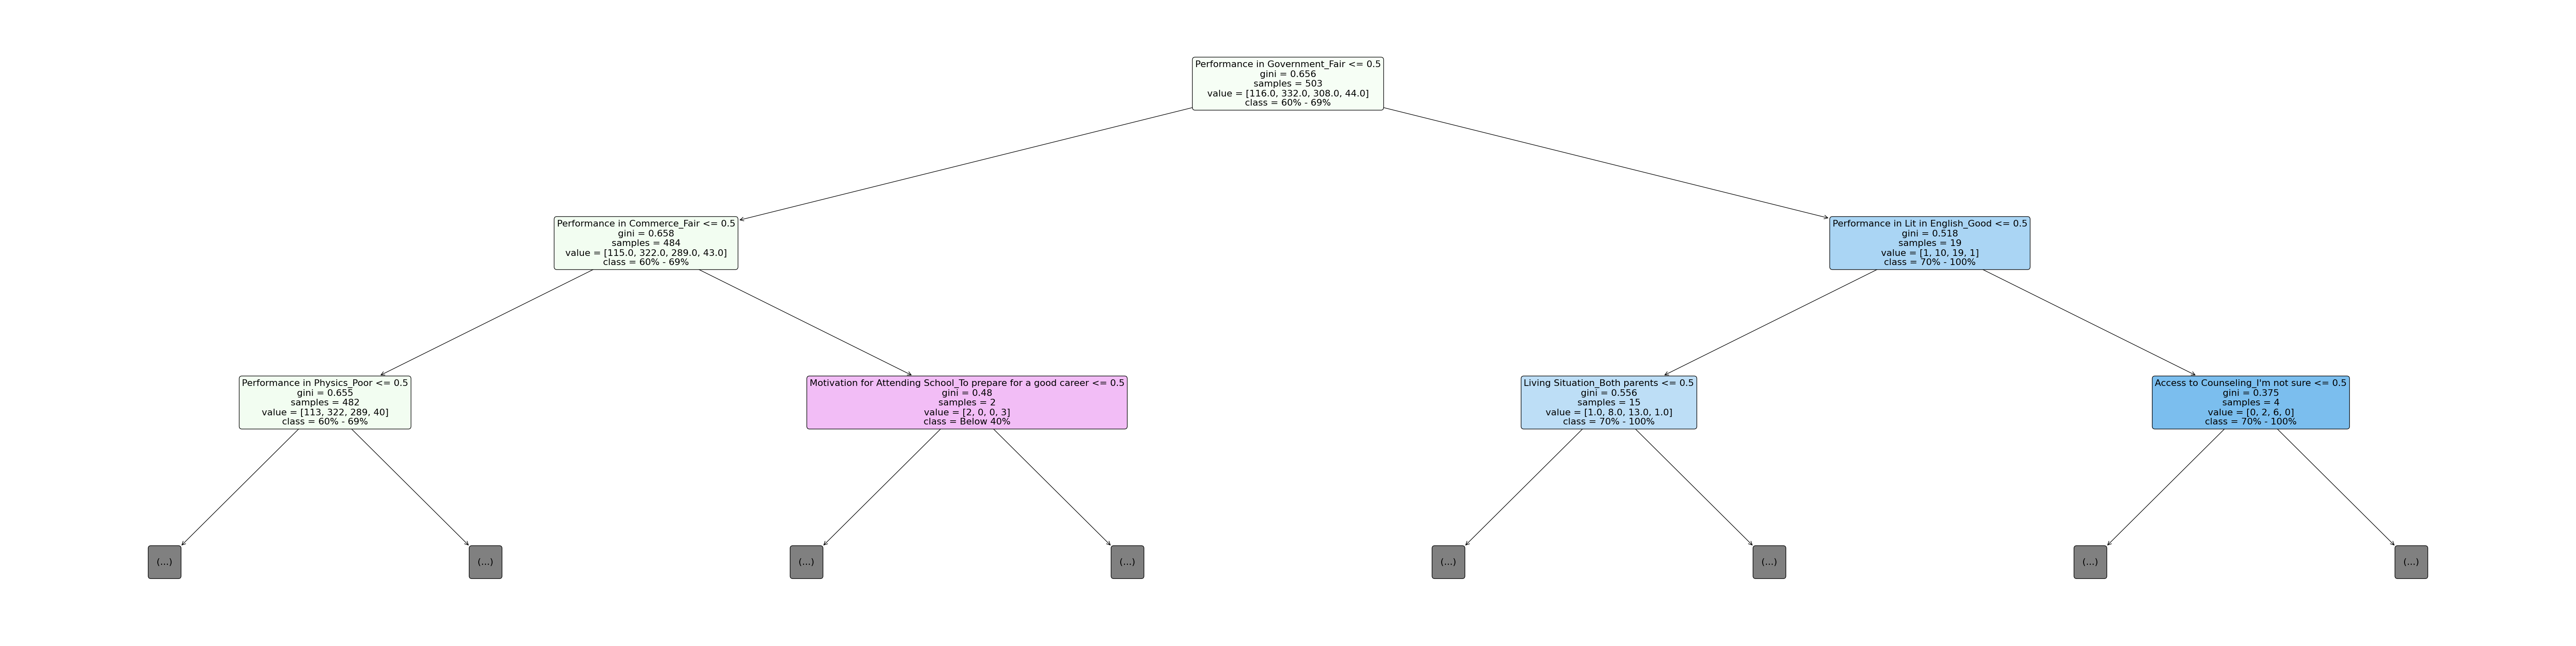

In [1721]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

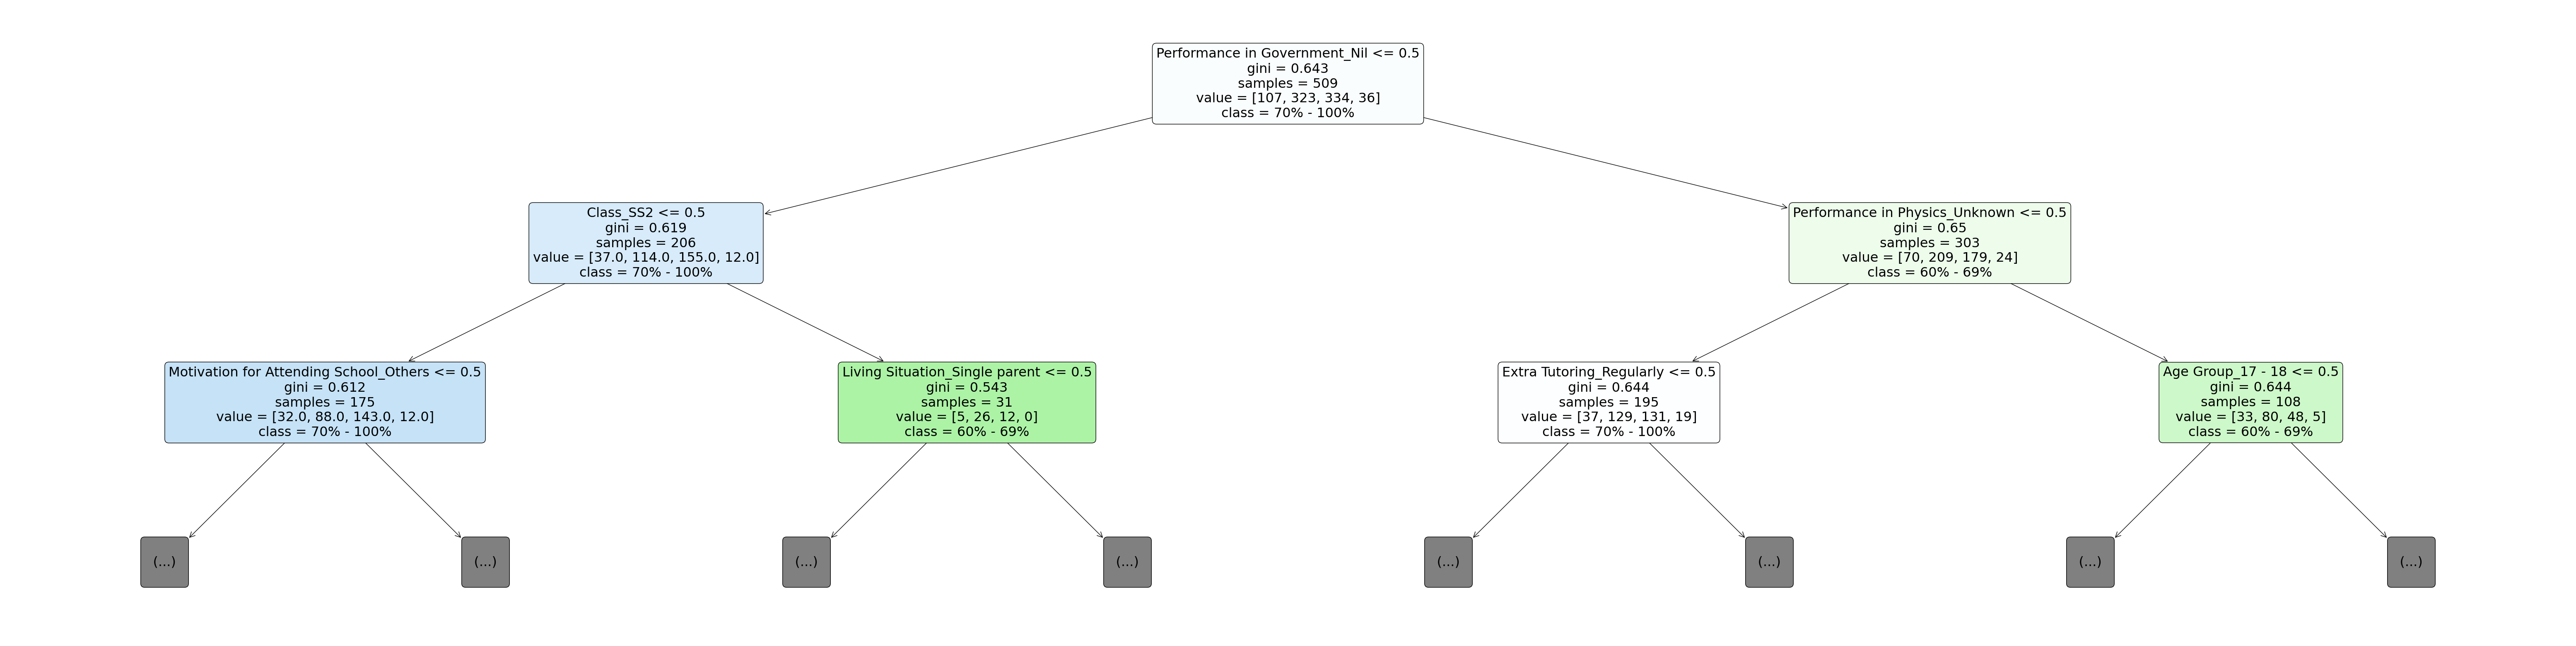

In [1723]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[20], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

In [1725]:
len(model.estimators_)

100

In [1727]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

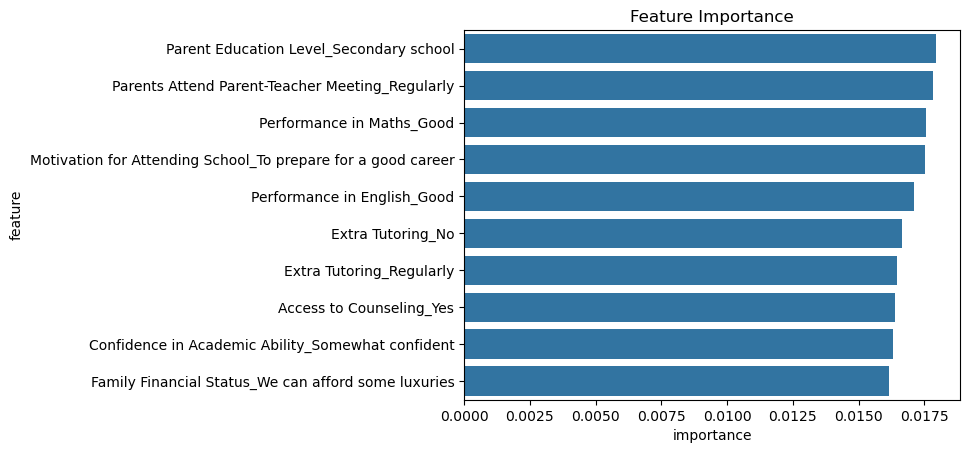

In [1729]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

### Hyperparameter Tuning with Random Forests

In [1738]:
base_model = RandomForestClassifier(random_state=30, n_jobs=-1).fit(X_train, train_targets)

In [1739]:
base_train_acc = base_model.score(X_train, train_targets)
base_val_acc = base_model.score(X_val, val_targets)

In [1742]:

base_accs = base_train_acc, base_val_acc
base_accs

(1.0, 0.46)

In [1777]:
# n_estimators - 100 estimators

model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=10)

In [1779]:
model.fit(X_train, train_targets)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [1781]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.98375, 0.39)